In [24]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['heart.csv']


In [25]:
heart=pd.read_csv("../input/heart.csv")
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


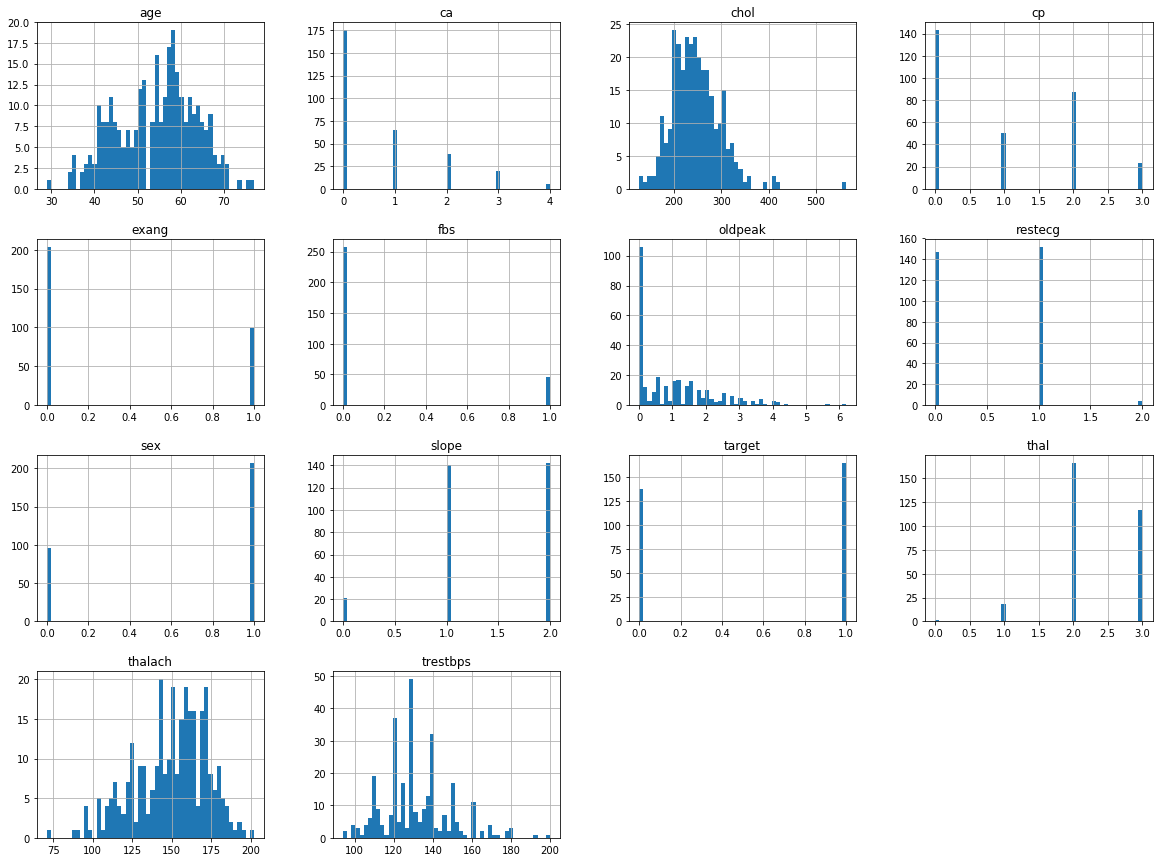

In [6]:
import matplotlib.pyplot as plt 
heart.hist(bins=50,figsize=(20,15))
plt.show()

**PCA for dimension reduction in order to pass from 14 to 2 or 3 dimension
**

In [7]:
#Columns Names
heart.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

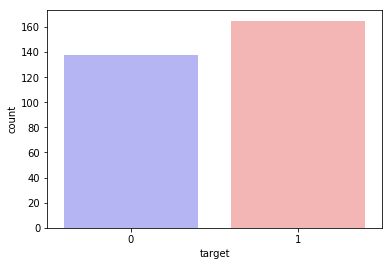

In [30]:
#Data Exploration
import seaborn as sns
heart.target.value_counts()
sns.countplot(x="target", data=heart, palette="bwr")
plt.show()

In [31]:
df=heart
countNoDisease = len(df[df.target == 0])
countHaveDisease = len(df[df.target == 1])
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((countNoDisease / (len(df.target))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((countHaveDisease / (len(df.target))*100)))

Percentage of Patients Haven't Heart Disease: 45.54%
Percentage of Patients Have Heart Disease: 54.46%


In [32]:
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


In [ ]:
#Create Dummy Variable


In [36]:
#Logistic Regression
y = df.target.values
x_data = df.drop(['target'], axis = 1)




,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2


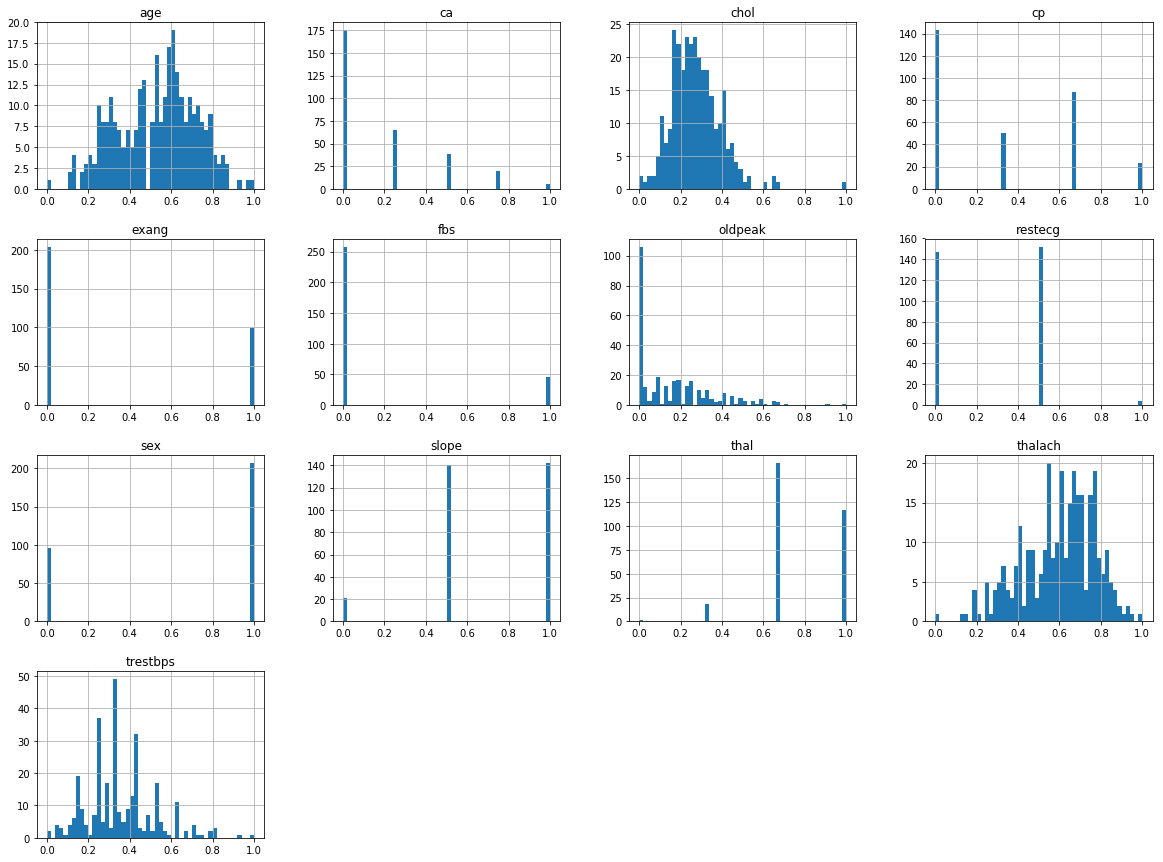

In [40]:
#Normalise Data

# Normalize So, the entire range of values of X from min to max are mapped to the range 0 to 1.Min-max normalisation is often known as feature scaling 
# where the values of a numeric range of a feature of data, i.e. a property, are reduced to a scale between 0 and 1. 
# Yi = [Xi - min(X)]/[max(X) - min(X)]
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values

#Visualisation of Normalized Data
import matplotlib.pyplot as plt 
x.hist(bins=50,figsize=(20,15))
plt.show()

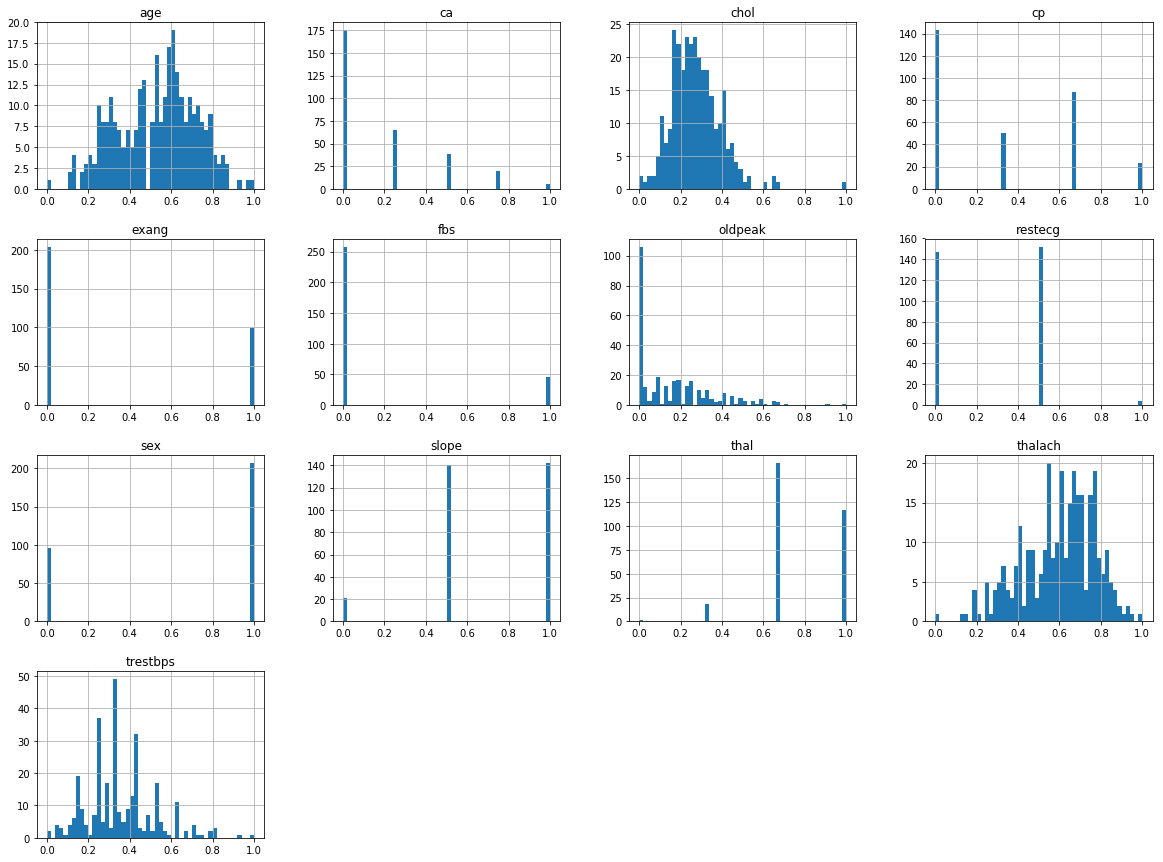

In [14]:
#4 different automatic feature selection techniques:


# Feature Extraction with RFE
from pandas import read_csv
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
# load data

array = heart.values
X = array[:,0:13]
Y = array[:,13]
# feature extraction
model = LogisticRegression()
rfe = RFE(model, 3)
fit = rfe.fit(X, Y)
print(fit.n_features_)
print(fit.support_)
print(fit.ranking_)


#PCA
# Feature Extraction with PCA
import numpy
from pandas import read_csv
from sklearn.decomposition import PCA
array = heart.values
X = array[:,0:13]
Y = array[:,13]
# feature extraction
pca = PCA(n_components=3)
fit = pca.fit(X)
# summarize components
print (fit.explained_variance_ratio_)
print(fit.components_)

#FeatureImportance
from pandas import read_csv
from sklearn.ensemble import ExtraTreesClassifier
array = heart.values
X = array[:,0:13]
Y = array[:,13]
# feature extraction
model = ExtraTreesClassifier()
model.fit(X, Y)
print(model.feature_importances_)

3
[False  True False False False False False False  True False  True False
 False]
[ 9  1  3  8 11 10  6  7  1  5  1  2  4]
[0.7475642  0.15037022 0.08459685]
[[ 3.94611190e-02 -1.78278639e-03 -1.53716667e-03  4.75880705e-02
   9.98053283e-01  1.16389852e-04 -1.55243101e-03 -7.35838010e-03
   6.31483108e-04  1.32988432e-03 -9.99857233e-05  1.46773705e-03
   1.18215354e-03]
 [ 1.82186255e-01  7.93727347e-04 -1.25419057e-02  1.03810033e-01
  -1.94250905e-02  4.61971663e-04 -1.20213285e-03 -9.77188942e-01
   7.54817512e-03  1.79407185e-02 -1.04271838e-02  1.01095919e-02
   2.59241726e-03]
 [ 1.25504851e-01 -1.06523049e-03  6.16323248e-03  9.82278058e-01
  -5.08647357e-02  3.66506652e-03 -2.70960599e-03  1.28926064e-01
  -2.85338412e-05  9.21430005e-03 -2.30213080e-03  4.19733045e-03
   1.21740467e-03]]
[0.05469734 0.04819712 0.10983862 0.05626248 0.06420298 0.01764263
 0.03975658 0.08159464 0.0966972  0.09136723 0.07137367 0.17841823
 0.08995128]


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

ValueError: DataFrame constructor not properly called!